# Instalamos Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# pip install pyarrow => para leer parquet
df_raw = pd.read_parquet('../data/reservas_hoteles.parquet', engine='pyarrow')

In [3]:
df_raw

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,36,367.65,Hotel Las Estrellas,3.0,Madrid
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,38,144.35,Gran Hotel Madrid,4.0,Madrid
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,29,463.32,Hotel Jardines del Rey,2.0,Madrid
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,15,247.63,Hotel Palacio Imperial,1.0,Madrid


# Copiamos el RAW

In [4]:
df = df_raw.copy()

# Visualizacion info especifica del df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_reserva       15098 non-null  object 
 1   id_cliente       15098 non-null  object 
 2   nombre           15098 non-null  object 
 3   apellido         15098 non-null  object 
 4   mail             15098 non-null  object 
 5   competencia      15098 non-null  bool   
 6   fecha_reserva    15098 non-null  object 
 7   inicio_estancia  15023 non-null  object 
 8   final_estancia   15023 non-null  object 
 9   id_hotel         15098 non-null  int64  
 10  precio_noche     9874 non-null   float64
 11  nombre_hotel     15098 non-null  object 
 12  estrellas        9926 non-null   float64
 13  ciudad           15098 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


- Con la funcion info vemos que existen en total 15.098 registros
- Existen registros con valores nulos
    - 75 en inicio y fin de la estancia
    - 5224 sin precio de reserva
    - 5172 sin estrellas
- Los Dtypes son correctos exepto las de inicio y fin de la estancia. Hay que modificar

# Utilizamos funcion describe para saber frecuencias

## Los objetos y categorias

In [6]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
id_reserva,15098,15000,601ac12e-ea66-4fcf-bc6d-215806656d1b,2
id_cliente,15098,14847,91cf76ea-170c-459c-82a1-a2dde074ad38,3
nombre,15098,934,Nazaret,41
apellido,15098,1085,Giménez,26
mail,15098,14905,victoriano.ródenas@example.com,3
fecha_reserva,15098,13,,5172
inicio_estancia,15023,1,2025-03-01,15023
final_estancia,15023,1,2025-03-02,15023
nombre_hotel,15098,20,,5172
ciudad,15098,2,Madrid,9926


### 1. Datos sobre reservas y clientes
    - id_reserva: Hay 15.098 registros, pero solo 15.000 valores únicos, lo que sugiere que algunas reservas están duplicadas.
    - id_cliente: Hay 14.847 clientes únicos, lo que indica que algunos clientes han hecho múltiples reservas (el cliente más frecuente ha hecho 3 reservas).
    - nombre y apellido: Hay 934 nombres únicos y 1,085 apellidos únicos, lo que podría sugerir nombres comunes o errores de entrada de datos.

### 2. Contacto y correos duplicados
    - mail: Hay 14.905 correos únicos, lo que indica que algunos correos están repetidos (3 veces en el caso más frecuente). Esto podría ser porque un mismo cliente usa el mismo correo para distintas reservas.
    
### 3. Fechas de reserva y estancia
    - fecha_reserva: Solo 13 valores únicos, lo que sugiere que todas las reservas se hicieron en muy pocas fechas.
    - inicio_estancia y final_estancia: Solo 1 valor único cada uno (2025-03-01 a 2025-03-02), lo que indica que todas las reservas son para una sola noche y en la misma fecha.

### 4. Hoteles y ciudades
    - nombre_hotel: Solo 20 valores únicos, pero 5,172 reservas tienen un hotel vacío, lo que puede indicar datos faltantes.
    - ciudad: Solo 2 ciudades únicas con Madrid como la más frecuente (9,926 veces), lo que indica que la mayoría de las reservas son en Madrid.

### Posibles problemas o mejoras
- Reservas duplicadas (id_reserva no es completamente único). → Revisar si hay registros repetidos.
- Correos repetidos → Verificar si los clientes comparten correos o si hay errores en los datos.
- Fechas limitadas → Se analizara solo un fin de semana de marzo
- Datos faltantes en nombre_hotel → Investigar por qué hay tantas reservas sin hotel registrado.
- Madrid domina los datos, pero se utilizara para ser key en la relacion de tablas

## Analisis estadistico de variables numericas

In [7]:
df.describe(include=['float']).T.round(2)

,count,mean,std,min,25%,50%,75%,max
precio_noche,9874.0,275.12,129.41,50.01,163.12,273.32,387.83,499.82
estrellas,9926.0,3.01,1.41,1.00,2.00,3.00,4.00,5.00


### 1. Datos sobre precio por noche
    - Los precios oscilan entre 50.01 y 499.82.
    - El precio medio es 275.12, con una desviación estándar de 129.41, lo que sugiere una distribución relativamente amplia de precios.
    - La mediana (273.32) está muy cerca de la media (275.12), lo que indica que la distribución no es muy sesgada.
    - El 25% de los hoteles cuesta menos de 163.12 por noche, mientras que el 25% más caro cuesta más de 387.83.

### 2. Datos sobre estrellas
    - La media de estrellas es 3.01, lo que indica que la mayoría de los hoteles son de 3 estrellas.
    - La desviación estándar es 1.41, lo que sugiere que hay bastante variedad en la cantidad de estrellas.
    - El 25% de los hoteles tiene 2 estrellas o menos, mientras que el 25% más alto tiene 4 estrellas o más.
    - El rango cubre desde hoteles de 1 hasta 5 estrellas.

C:\Users\Agus\AppData\Local\Temp\ipykernel_17200\738692488.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['estrellas'],


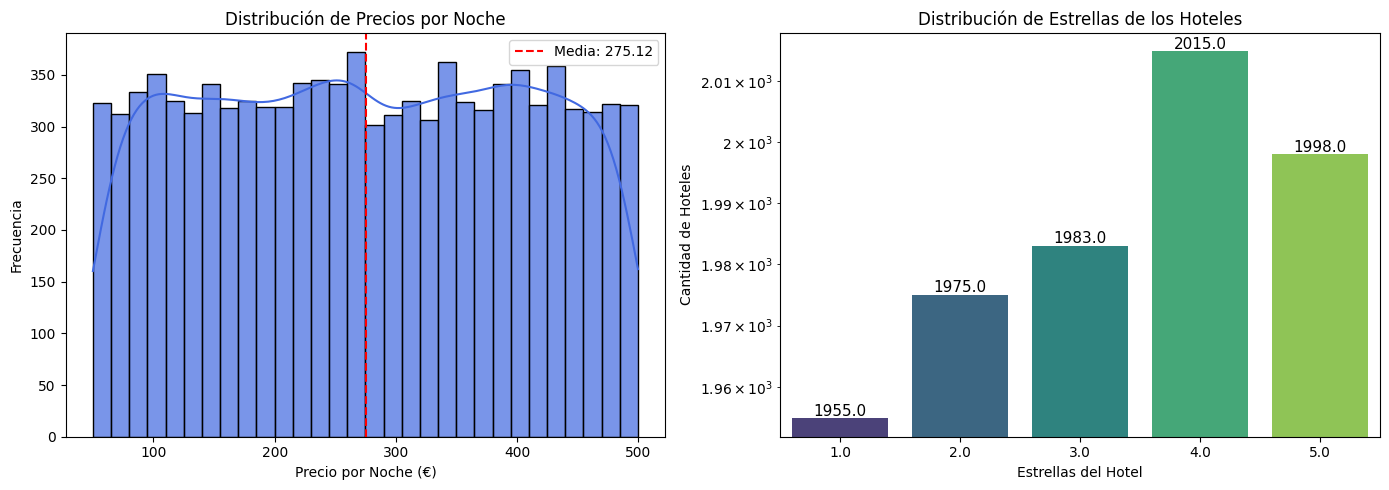

In [8]:
# Crear figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Distribución de precios por noche
sns.histplot(df['precio_noche'],
             bins=30, 
             kde=True, 
             color='royalblue', 
             alpha=0.7, 
             ax=axes[0])

axes[0].axvline(df['precio_noche'].mean(), 
                color='red', 
                linestyle='dashed', 
                label=f'Media: {df["precio_noche"].mean():.2f}')
axes[0].set_xlabel("Precio por Noche (€)")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribución de Precios por Noche")
axes[0].legend()

# Gráfico 2: Distribución de estrellas de hoteles
sns.countplot(x=df['estrellas'], 
              palette="viridis",
              ax=axes[1])
axes[1].set_xlabel("Estrellas del Hotel")
axes[1].set_ylabel("Cantidad de Hoteles")
axes[1].set_title("Distribución de Estrellas de los Hoteles")
#para ajustar las frecuencia y se vea mejor el gráfico
axes[1].set_yscale('log')
#agregamos etiquetas a las barras
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

#quitamos etiquetas de cantidad de hoteles
    
# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


- asignar a cada hotel unico un ID 
- a clientes id por medio del mail
- hacer la media de cada precio 
    - por medio del hotel
    - a travez de la fecha o
    - de los dos

C:\Users\Agus\AppData\Local\Temp\ipykernel_17200\305809313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='hotel_id',


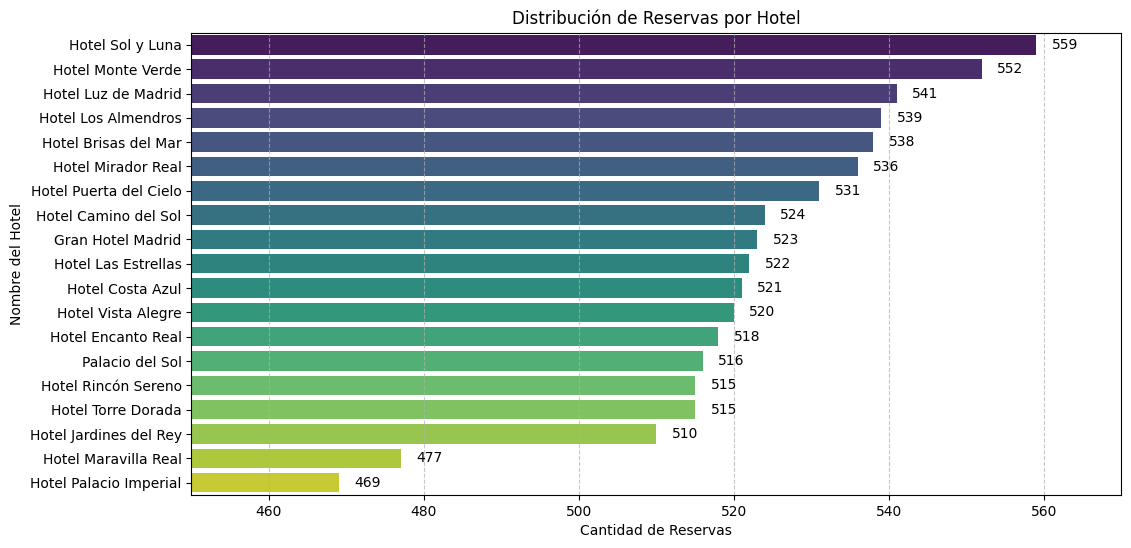

In [9]:
# para asignar un id a cada hotel
df['hotel_id'] = df.groupby(['nombre_hotel']).ngroup()

# Agrupamos por hoteles para ver distribucion
df_hoteles = df.groupby('nombre_hotel')['hotel_id'].count().sort_values(ascending=False).reset_index()
df_hoteles

## Para excluir los hoteles con mas de 5000 reservas
df_hoteles_filtrado = df_hoteles[df_hoteles['hotel_id'] < 5000]

# Crear gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='hotel_id', 
                 y='nombre_hotel', 
                 data=df_hoteles_filtrado, 
                 palette="viridis")

# Agregar etiquetas al final de cada barra
for index, value in enumerate(df_hoteles_filtrado['hotel_id']):
    ax.text(value + 2, index, str(value), va='center', fontsize=10, color='black')

# Mejorar diseño
plt.xlabel("Cantidad de Reservas")
plt.ylabel("Nombre del Hotel")
plt.title("Distribución de Reservas por Hotel")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.xlim(450, 570)
plt.show()



## Creamos dos dataframes diferentes, uno para hoteles propios y otro para hoteles de competencia por medio de la columna "competencia"

In [10]:

df_propios = df[df['competencia'] == False]
df_competencia = df[df['competencia'] == True]
df_competencia['id_hotel'].unique() #Verificamos los id_jotel de la competencia para agregarlos al df que viene scrapeado

array([113, 194, 131, 114, 103, 181, 128, 186, 135, 117])

# Unificamos tablas de parquet y Hoteles_competencia scrapeado

In [11]:
import numpy as np
import pandas as pd
df_hoteles_competencia = pd.read_csv('../data/hoteles_competencia.csv')
df_hoteles_competencia["precio_noche"] = df_hoteles_competencia["precio_noche"].astype('float64')

# Asegurar que los tipos de datos sean iguales para evitar problemas en el merge
df["id_hotel"] = df["id_hotel"].astype(str)
df_hoteles_competencia["id_hotel"] = df_hoteles_competencia["id_hotel"].astype(str)

# Fusionar los DataFrames
df_hoteles_merg = df.merge(df_hoteles_competencia, on="id_hotel", how="left", suffixes=("", "_comp"))


# Convertir cadenas vacías en NaN para que fillna() funcione correctamente
df_hoteles_merg["nombre_hotel"].replace("", np.nan, inplace=True)
df_hoteles_merg["fecha_reserva"].replace("", np.nan, inplace=True)

# Rellenar valores faltantes
df_hoteles_merg["nombre_hotel"].fillna(df_hoteles_merg["nombre_hotel_comp"], inplace=True)
df_hoteles_merg["estrellas"].fillna(df_hoteles_merg["estrellas_comp"], inplace=True)
df_hoteles_merg["precio_noche"].fillna(df_hoteles_merg["precio_noche_comp"], inplace=True)
df_hoteles_merg["fecha_reserva"].fillna(df_hoteles_merg["fecha_reserva_comp"], inplace=True)

# Eliminar columnas auxiliares
df_hoteles_merg.drop(columns=["nombre_hotel_comp", "estrellas_comp", "precio_noche_comp","fecha_reserva_comp"], inplace=True)

# Verificar que los valores se han rellenado correctamente
df_hoteles_merg


C:\Users\Agus\AppData\Local\Temp\ipykernel_17200\2288746609.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hoteles_merg["nombre_hotel"].replace("", np.nan, inplace=True)
C:\Users\Agus\AppData\Local\Temp\ipykernel_17200\2288746609.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,hotel_id
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,2025-02-20,2025-03-01,2025-03-02,113,170.00,ibis Styles Madrid Prado,4.7,,0
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,2025-02-20,2025-03-01,2025-03-02,194,106.00,Mercure Madrid Centro,4.4,,0
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid,12
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid,2
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,36,367.65,Hotel Las Estrellas,3.0,Madrid,7
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,38,144.35,Gran Hotel Madrid,4.0,Madrid,1
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,29,463.32,Hotel Jardines del Rey,2.0,Madrid,6
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,15,247.63,Hotel Palacio Imperial,1.0,Madrid,13


# Limpieza dataframe

In [20]:
#Las reservas que no tinen inicio y final de la estancia las consideramos como reservas caidas y las eliminamos de la base de datos
df_hoteles_merg = df_hoteles_merg.dropna(subset=['inicio_estancia', 'final_estancia'])
# Rellenmaos la columna ciudad con "Madrid" para que sea más claro
df_hoteles_merg["ciudad"] = "Madrid"

#todo lo que sea fecha lo pasamos a datetime
df_hoteles_merg["inicio_estancia"] = pd.to_datetime(df_hoteles_merg["inicio_estancia"])
df_hoteles_merg["final_estancia"] = pd.to_datetime(df_hoteles_merg["final_estancia"])
df_hoteles_merg["fecha_reserva"] = pd.to_datetime(df_hoteles_merg["fecha_reserva"])

df_hoteles_merg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15023 entries, 0 to 15097
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15023 non-null  object        
 1   id_cliente       15023 non-null  object        
 2   nombre           15023 non-null  object        
 3   apellido         15023 non-null  object        
 4   mail             15023 non-null  object        
 5   competencia      15023 non-null  bool          
 6   fecha_reserva    15023 non-null  datetime64[ns]
 7   inicio_estancia  15023 non-null  datetime64[ns]
 8   final_estancia   15023 non-null  datetime64[ns]
 9   id_hotel         15023 non-null  object        
 10  precio_noche     15023 non-null  float64       
 11  nombre_hotel     15023 non-null  object        
 12  estrellas        15023 non-null  float64       
 13  ciudad           15023 non-null  object        
 14  hotel_id         15023 non-null  object    

## Vamos a unificar correctamente las columnas de id_cliente con el mail del cliente y nos quedamos unicamente con el que tinene mas de un id_cliente

In [21]:
# Estrategia 1: Resolver conflictos donde un mail tiene más de un id_cliente
# Tomaremos el id_cliente más frecuente para cada correo

# Creamos una función que asigna el id_cliente más frecuente
def resolver_conflictos_mail(group):
    if len(group['id_cliente'].unique()) > 1:
        # Si hay más de un id_cliente, asignamos el id_cliente más frecuente
        id_cliente_frecuente = group['id_cliente'].mode()[0]
        group['id_cliente'] = id_cliente_frecuente
    return group

# Aplicamos la función para resolver los conflictos de mails
df_resuelto_mail = df_hoteles_merg.groupby('mail', group_keys=False).apply(resolver_conflictos_mail)

# Estrategia 2: Resolver conflictos donde un id_cliente tiene más de un mail
# Tomaremos el primer correo asociado a cada id_cliente

# Creamos una función que asigna el primer correo a cada id_cliente
def resolver_conflictos_cliente(group):
    if len(group['mail'].unique()) > 1:
        # Si hay más de un mail, asignamos el primer correo
        primer_mail = group['mail'].iloc[0]
        group['mail'] = primer_mail
    return group

# Aplicamos la función para resolver los conflictos de id_cliente
df_resuelto_cliente = df_resuelto_mail.groupby('id_cliente', group_keys=False).apply(resolver_conflictos_cliente)

# Mostrar el dataframe final sin conflictos
print("\nDataframe resuelto:")
df_resuelto_cliente



C:\Users\Agus\AppData\Local\Temp\ipykernel_17200\123312104.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resuelto_mail = df_hoteles_merg.groupby('mail', group_keys=False).apply(resolver_conflictos_mail)



Dataframe resuelto:


C:\Users\Agus\AppData\Local\Temp\ipykernel_17200\123312104.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resuelto_cliente = df_resuelto_mail.groupby('id_cliente', group_keys=False).apply(resolver_conflictos_cliente)


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad,hotel_id
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,2025-02-20,2025-03-01,2025-03-02,113,170.00,ibis Styles Madrid Prado,4.7,Madrid,113
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,feliciana.cantón@example.com,True,2025-02-20,2025-03-01,2025-03-02,194,106.00,Mercure Madrid Centro,4.4,Madrid,194
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid,12
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid,2
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com,False,2025-02-02,2025-03-01,2025-03-02,36,367.65,Hotel Las Estrellas,3.0,Madrid,7
15094,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com,False,2025-02-07,2025-03-01,2025-03-02,38,144.35,Gran Hotel Madrid,4.0,Madrid,1
15095,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com,False,2025-02-08,2025-03-01,2025-03-02,29,463.32,Hotel Jardines del Rey,2.0,Madrid,6
15096,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com,False,2025-02-10,2025-03-01,2025-03-02,15,247.63,Hotel Palacio Imperial,1.0,Madrid,13


### Limpiamos columna del id del hotel

In [22]:
# Convertimos la columna "hotel_id" a string para evitar errores de comparación
df_resuelto_cliente["hotel_id"] = df_resuelto_cliente["hotel_id"].astype(str)

# todos los "hotel_id" que tengan valor = 0 los cambiamos por el valor que se encuentra en la columna "id_hotel" 
df_resuelto_cliente.loc[df_resuelto_cliente["hotel_id"] == "0", "hotel_id"] = df_resuelto_cliente["id_hotel"]
hoteles_df = df_resuelto_cliente[["hotel_id", "nombre_hotel"]].drop_duplicates()

#transformamos la columna "hotel_id" a int para poder hacer la comparación
df_resuelto_cliente["hotel_id"] = df_resuelto_cliente["hotel_id"].astype(int)

#creamos el dataframe final con los datos de las reservas
df_final = df_resuelto_cliente.copy()

#eliminnamos columans id_hotel y cambiamos de nombre la columna hotel_id por id_hotel
df_final = df_final.drop(columns=["id_hotel"])
df_final = df_final.rename(columns={"hotel_id": "id_hotel"})


In [23]:

#ordenamos las columnas
df_final = df_final[['id_hotel', 'nombre_hotel', 'ciudad', 'estrellas', 'precio_noche', 'fecha_reserva', 'inicio_estancia', 'final_estancia',  'competencia','id_reserva', 'id_cliente','nombre','apellido','mail']]
df_final

,id_hotel,nombre_hotel,ciudad,estrellas,precio_noche,fecha_reserva,inicio_estancia,final_estancia,competencia,id_reserva,id_cliente,nombre,apellido,mail
0,113,ibis Styles Madrid Prado,Madrid,4.7,170.00,2025-02-20,2025-03-01,2025-03-02,True,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com
1,194,Mercure Madrid Centro,Madrid,4.4,106.00,2025-02-20,2025-03-01,2025-03-02,True,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,feliciana.cantón@example.com
2,12,Hotel Monte Verde,Madrid,1.0,119.96,2025-02-09,2025-03-01,2025-03-02,False,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com
3,2,Hotel Brisas del Mar,Madrid,5.0,211.53,2025-02-08,2025-03-01,2025-03-02,False,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com
4,3,Hotel Camino del Sol,Madrid,1.0,378.37,2025-02-02,2025-03-01,2025-03-02,False,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,7,Hotel Las Estrellas,Madrid,3.0,367.65,2025-02-02,2025-03-01,2025-03-02,False,49c9a352-a260-46fb-9edc-a2c2d05fdfb9,cc50c0c1-a589-44b7-8a41-2c731d033f89,Victoriano,Miralles,victoriano.miralles@example.com
15094,1,Gran Hotel Madrid,Madrid,4.0,144.35,2025-02-07,2025-03-01,2025-03-02,False,f07370e3-feeb-4893-a9ff-4ec4fb518a55,2bf0215f-7f7b-4cfb-9a37-d2022c492410,Anacleto,Toledo,anacleto.toledo@example.com
15095,6,Hotel Jardines del Rey,Madrid,2.0,463.32,2025-02-08,2025-03-01,2025-03-02,False,1d4b9293-1733-45ce-8a8e-79d3ac4694eb,4ba34638-c43e-455f-886d-b3e3dd223a07,Máxima,Mayoral,máxima.mayoral@example.com
15096,13,Hotel Palacio Imperial,Madrid,1.0,247.63,2025-02-10,2025-03-01,2025-03-02,False,d6823ca7-e236-48b1-bf68-6b88d9b6534a,a017cb9c-160b-4b90-b4a9-4bdb2dce546a,Rafa,Alcaraz,rafa.alcaraz@example.com


In [28]:
# exportamos el dataframe final a un archivo parquet
df_final.to_pickle('../data/reservas_hoteles_final.pkl')